### Lab 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Question 1 Visualations

In [2]:
# Creation of 30 samples from 4 distributions
SAMPLE_SIZE = 30 # 30 SAMPLES.
mu1 = 0
sigma1 = 1
mu2 = 2
sigma2 = 4


x1  = stats.norm.rvs(mu1, sigma1, SAMPLE_SIZE, random_state=2487776868)  # Normal 0, 1
x2 = stats.norm.rvs(mu2, sigma2, SAMPLE_SIZE, random_state=1383195524)  # Normal 2,4
x3 = stats.uniform.rvs(0, 1, SAMPLE_SIZE, random_state=37922943) # Uniform 0,1
x4 = x3 * stats.uniform.rvs(0,1, SAMPLE_SIZE, random_state=937517380)
# x4 model is product of distributions, Uniform(0,1) * Uniform(0,1)
    
print(x1, x2, x3, x4)


[-0.28070157 -0.67367664  0.83304117  0.2729754  -1.10230685 -0.21002288
 -1.99464995 -2.63511378 -0.23411619 -1.84546383 -0.1370342  -1.32986248
 -0.44368153  0.4920399  -0.07047359  0.56699463  0.99780322  1.3850732
 -0.36987351  0.61874182 -0.53213278 -0.20134958  0.48276786  0.32166637
  0.11234569 -0.99684594  0.32197129  1.2417974  -0.29672023  0.1171036 ] [-0.4866457   5.34480597 10.1251726  -1.01597594  6.5223306  -2.76498307
  4.94575732  2.39763604  8.23586733  2.96151767 -4.85843125  7.03132106
 -2.1884676  -7.13883146  4.41041247  2.38366803  2.42992494 -0.69917507
  0.50801238  2.2222012   2.8501427   5.47723542  4.96376012  1.17677409
  2.56008045 -0.40214806  0.16188118  3.60075243  8.01919548  4.98307735] [0.36071684 0.23850228 0.70899011 0.26207415 0.28222079 0.7446988
 0.26646283 0.16898982 0.0451444  0.88789084 0.66022189 0.41267735
 0.64941883 0.22069435 0.07992707 0.662506   0.02166488 0.82885278
 0.05527823 0.6409723  0.51731174 0.99519697 0.98815919 0.76747645
 0

X1 (30,) [-0.28070157 -0.67367664  0.83304117  0.2729754  -1.10230685 -0.21002288
 -1.99464995 -2.63511378 -0.23411619 -1.84546383 -0.1370342  -1.32986248
 -0.44368153  0.4920399  -0.07047359  0.56699463  0.99780322  1.3850732
 -0.36987351  0.61874182 -0.53213278 -0.20134958  0.48276786  0.32166637
  0.11234569 -0.99684594  0.32197129  1.2417974  -0.29672023  0.1171036 ]
X2 (30,) [-0.4866457   5.34480597 10.1251726  -1.01597594  6.5223306  -2.76498307
  4.94575732  2.39763604  8.23586733  2.96151767 -4.85843125  7.03132106
 -2.1884676  -7.13883146  4.41041247  2.38366803  2.42992494 -0.69917507
  0.50801238  2.2222012   2.8501427   5.47723542  4.96376012  1.17677409
  2.56008045 -0.40214806  0.16188118  3.60075243  8.01919548  4.98307735]
X3 (30,) [0.80454911 0.76326869 0.91671342 0.77128244 0.77811391 0.9276019
 0.77277204 0.73952574 0.69696006 0.9698781  0.90163474 0.82186214
 0.89826313 0.75720085 0.70893518 0.90234618 0.68887322 0.95272536
 0.7004498  0.89561925 0.85618094 1.      

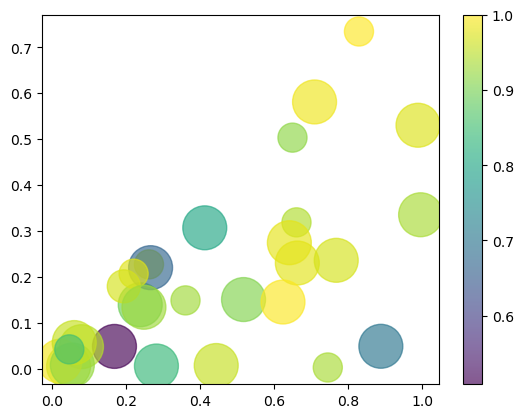

In [5]:
# Visualise this data. Bubble plot allows the 2D representation of 3D/4D data
# We must use a bubble plot because this is what we learn in lectures .
import math
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_normalisation(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = sigmoid(data - min_value) / (sigmoid(max_value - min_value))
    return normalized_data

def custom_normalisation_with_power(data):
    """ My own amazing normalisation for obtaining values which are within the range 0-1000 and also scale to exponential"""
    
    k = 0.1  # Adjust this scaling factor based on your data
    x0 = np.mean(data)  # Using the mean as the center point

    L = 1000  # Maximum value

    normalized_data = L / (1 + np.exp(-k * (np.exp(data*10) - x0))) # e**x*10 each element, so there is a bigger difference but values are still related, becuase initial scale values are really small
    return normalized_data


print("X1", x1.shape,x1)
print("X2", x2.shape, x2)
print("X3", x3.shape, sigmoid_normalisation(x3))
# print(x4)
print("X4", x4.shape, sigmoid_normalisation(x4*10))

plt.scatter(x3, x4, c=sigmoid_normalisation(x1), s=custom_normalisation_with_power(x2), alpha=0.65, cmap='viridis')
plt.colorbar()
plt.show()


# Normalised data using different normalisation, sigmoid between 0-1 for the color, so it is 

With this you can see the relation between distributions x3 and x4 due to the linear trend toward the top right.

#### Question 2 QQ Plots
We did this in the lecture and measures how percentiles compared between 2 distributions.

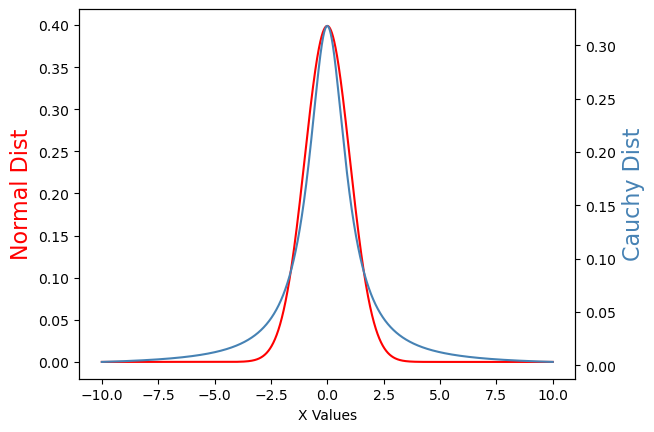

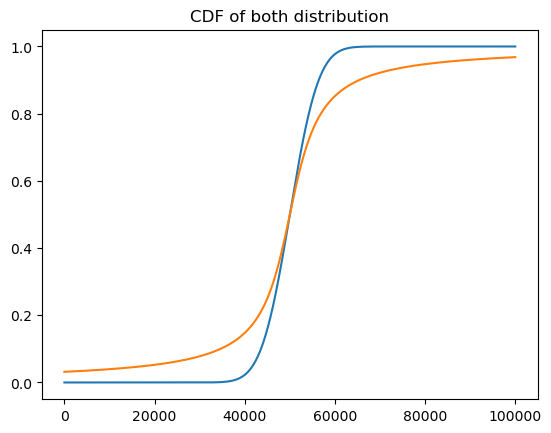

[7.61985302e-24 5.74299089e-23 4.15699185e-22 2.88985934e-21
 1.92947037e-20 1.23728927e-19 7.62051704e-19 4.50802745e-18
 2.56145674e-17 1.39796380e-16 7.32865015e-16 3.69047871e-15
 1.78519003e-14 8.29549494e-14 3.70314229e-13 1.58812230e-12
 6.54333730e-12 2.59020503e-11 9.85161705e-11 3.60031156e-10
 1.26431186e-09 4.26652414e-09 1.38365090e-08 4.31260889e-08
 1.29195183e-07 3.72031580e-07 1.02986059e-06 2.74084162e-06
 7.01362134e-06 1.72585555e-05 4.08438548e-05 9.29762127e-05
 2.03614968e-04 4.29060333e-04 8.70132505e-04 1.69867050e-03
 3.19301175e-03 5.78075912e-03 1.00833379e-02 1.69519783e-02
 2.74800255e-02 4.29739014e-02 6.48670197e-02 9.45693524e-02
 1.33260263e-01 1.81651071e-01 2.39761270e-01 3.06761682e-01
 3.80933385e-01 4.59771221e-01 5.40228779e-01 6.19066615e-01
 6.93238318e-01 7.60238730e-01 8.18348929e-01 8.66739737e-01
 9.05430648e-01 9.35132980e-01 9.57026099e-01 9.72519975e-01
 9.83048022e-01 9.89916662e-01 9.94219241e-01 9.96806988e-01
 9.98301330e-01 9.991298

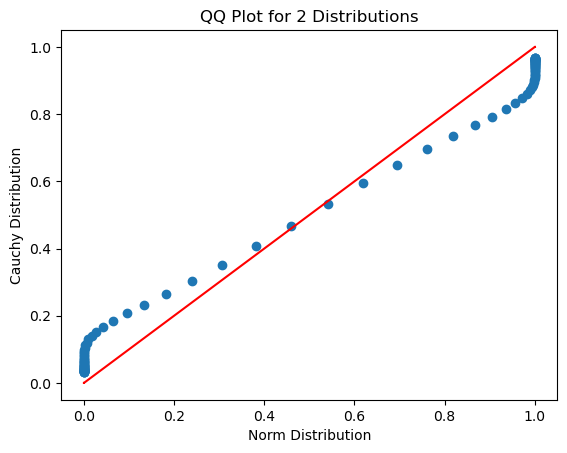

In [4]:
# Using the 2 distributions, Normal(0,1) <- x1
# 
# And the distribution of Cauchy(0, 1) <- x2
# --------

# Plot the combination of 2 distribution PDF as both are continuous.

# Documentation states: 
# loc is the mean of the normal distribution.
# scale is the standard deviation of the normal distribution.
x = np.linspace(-10, 10, 100000)  # for 100 points of the distribution.
y_norm = stats.norm.pdf(x, loc=0, scale=1)
y_cauchy = stats.cauchy.pdf(x, loc=0, scale=1)

# Print both these y coords on plot.

fig, ax = plt.subplots()
ax.plot(x, y_norm, color='red')
ax.set_xlabel('X Values')
ax.set_ylabel('Normal Dist', color='red', fontsize=16)
ax2 = ax.twinx()
ax2.plot(x, y_cauchy, color='steelblue')
ax2.set_ylabel('Cauchy Dist', color='steelblue', fontsize=16)
plt.show()




# Now we have a plot of both distributions, we should look at the QQ plots.

percentile = np.linspace(0,100,100)
y_norm = stats.norm.cdf(x, loc=0, scale=1)
y_cauchy = stats.cauchy.cdf(x, loc=0, scale=1)
plt.title('CDF of both distribution')
plt.plot(y_norm)
plt.plot(y_cauchy)
plt.show()

    # print(percentile)  # 0.001
# print(x_norm, y_norm)
qq_x = np.percentile(y_norm, percentile)
qq_y = np.percentile(y_cauchy, percentile)
print(qq_x, qq_y)

#print(len(qq_x), len(qq_y))
# Plot a graph for these. 

plt.title('QQ Plot for 2 Distributions')
plt.xlabel("Norm Distribution")
plt.ylabel("Cauchy Distribution")
plt.plot(qq_x, qq_y, 'o')
plt.plot(qq_x, qq_x, color='red')




Here we can assume, that the Cauchy distribution has much higher measure on it tail in comparison to the normal distribution as we have a vertical line towards the start, meaning for the the cauchy distribution the probability mass reaches 0.17 compared to 0 of the normal distribution.

--------



### Question 3: Independent Sum of Two Probability Measures

Summing of 2 distributions, in this question this is Beta(2,8) and Beta(8,2)

3.0196723517201067 0.0007377778557481104


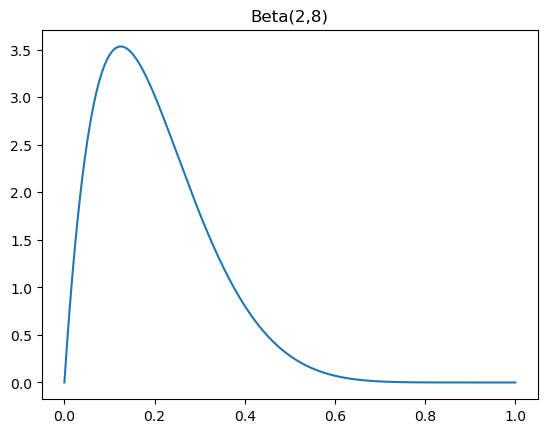

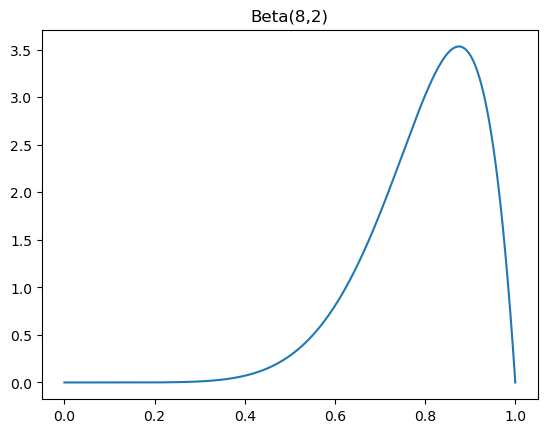

The support for Beta(2,8)?  Support set: (0.0, 1.0)
The support for Beta(8,2)? Support set: (0.0, 1.0)
Therefore the support of the sum of these 2 distributions are:
Support set: (0.0, 2.0) as the maximum value you can have is 2.0 and min is 0.0


In [7]:
# Beta Distribution has the support {0,1} regardless of paraemters of alpha and beta.

# Sum of the beta distribution
x = np.linspace(0, 1, 10000)
beta1 = stats.beta(a=2, b=8).pdf(x)
beta2 = stats.beta(a=8, b=2).pdf(x)
print(beta1[2000], beta2[2000])

# Combine the PMF of 2 distributions by summing thier probabilities.


# Plot this distribution for beta 1, beta 2 and sum of both beta 1 and 2.
plt.title("Beta(2,8)")
plt.plot(x, beta1)
plt.show()

plt.title("Beta(8,2)")
plt.plot(x, beta2)
plt.show()





beta_support1 = stats.beta.support(a=2, b=8)
print(f"The support for Beta(2,8)?  Support set: {beta_support1}")


beta_support2 = stats.beta.support(a=8, b=2)
print(f"The support for Beta(8,2)? Support set: {beta_support2}")


print(f"Therefore the support of the sum of these 2 distributions are:")
print("Support set: (0.0, 2.0) as the maximum value you can have is 2.0 and min is 0.0")


In [8]:
# Obtain a function for implements the integrand of the integral above.
# Implements f1(x) f2(t-x) where f1 is the density function of Beta(2,8)
# and f2 is the density function of Beta(8,2)


def integrand_func(x, t):
    """ Based on the question paper, this is:
        f1(x) * f2(t-x), they state this is a convolution of 2 functions.
         Which gives the density function of the sum.
    """
    
    # Or do I need to calculate the pdf calculation myself.
    # Because this isn't a value
    return stats.beta(2,8).pdf(x) * stats.beta(8,2).pdf(t-x)

# integrand_func(0.3, 0.5))

In [9]:
# Testing the beta PDF function.
print(integrand_func(0.3, 0.5))


print(stats.beta.pdf([0.5, 0.4, 0.3], a=2, b=8))
print(stats.beta.pdf(0.3, a=2, b=8))

0.0013115126513664008
[0.28125    0.80621568 1.77885288]
1.7788528800000005


In [10]:
# Generate 100 points
from scipy import integrate  # So we can use the quad function.


def get_integrate_pmf():
    # print(t)
    # Generate the PDF for the sum of the 2 beta distributions.
    lower_limit = -float('inf')
    upper_limit = float('inf')
    pmf_values = []
    for t_elem in np.linspace(0,2, 100):
        integ_val = integrate.quad(integrand_func, lower_limit, upper_limit, args=(t_elem))
        # print(integ_val)
        pmf_values.append(integ_val[0] - integ_val[1])
    
    
    # print(pmf_values)
    return pmf_values

actual_y = get_integrate_pmf()
# print(actual_y)



100


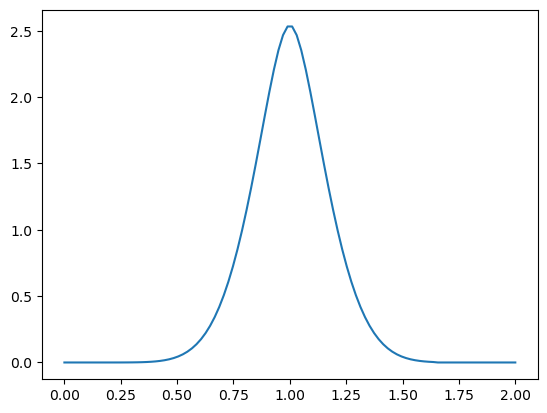

In [11]:

print(len(actual_y)) # 100, 2
plt.plot(np.linspace(0,2,100), actual_y)

summed beta [1.17289541 1.12083376 1.18063922 ... 1.18347106 0.95557402 0.89041053]


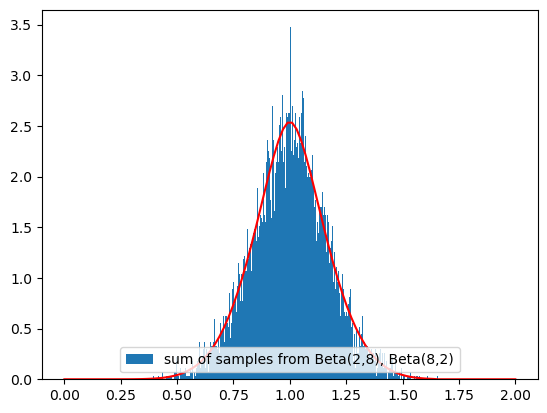

In [12]:
x = np.linspace(0,1,10000)

#y = sum_pdf_func()
# Prepare label for the plot
#dist_label = 'pdf of [Beta(2,8)+Beta(8,2)]'
#plt.plot(x,y, color = 'red', label = dist_label)
N = 10000
seed = 61611
beta1 = stats.beta.rvs(2,8,size = N, random_state = seed)
beta2 = stats.beta.rvs(8,2,size = N, random_state = seed + 1)
summed_beta = beta1 + beta2
print('summed beta', summed_beta)


# Prepare label for the histogram
hist_label = 'sum of samples from Beta(2,8), Beta(8,2)'
hist_label = hist_label.format(mu1 = mu1, sigma1 = sigma1, mu2 = mu2, sigma2 = sigma2)

plt.hist(summed_beta, 500, density = True, label=hist_label)
plt.legend(fontsize = 10, loc = 'lower center')

plt.plot(np.linspace(0,2,100), actual_y, color='red')
plt.show()

--------
### Question 4: Sample mean process and sample mean distribution


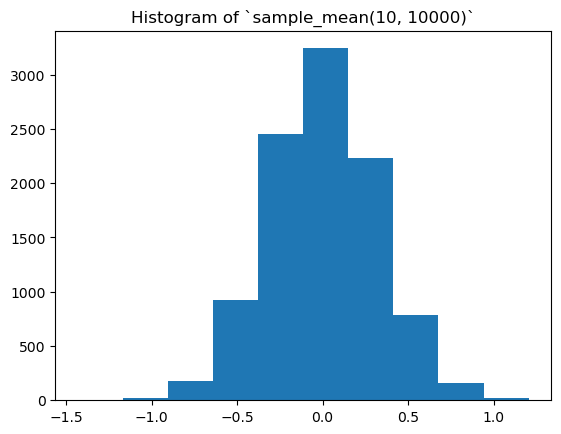

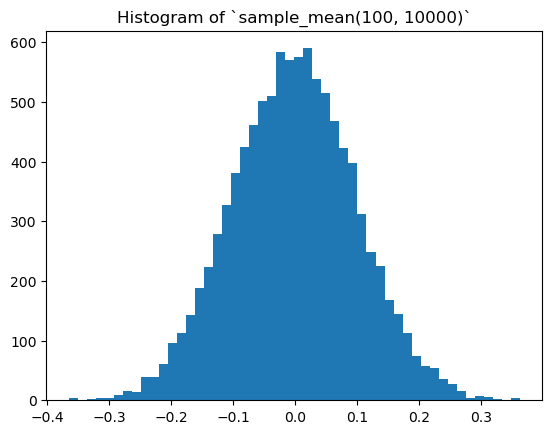

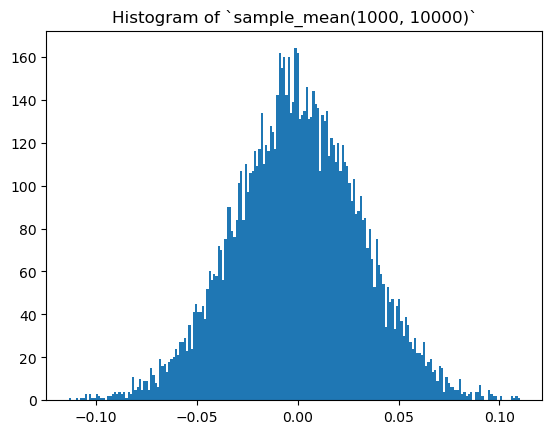

In [13]:
import random 

def sample_mean(m, n):
    """ Return array of length n containing m samples from the standard normal distribution and computing thier sample mean"""
    result = []
    for sample in range(n):
        sample_values = stats.norm.rvs(size = m, random_state = random.randint(1, 2**25))
        result.append(sum(sample_values) / m)
        

    # So should I compute thier sample mean and present an output array of [1, n]
    # Or return an array of with the samples m, giving shape of [m,n]
    return np.array(result)


plt.title("Histogram of `sample_mean(10, 10000)`")
result = sample_mean(10, 10000)
plt.hist(result, bins=10)
plt.show()
# print(result)

plt.title("Histogram of `sample_mean(100, 10000)`")
result = sample_mean(m=100, n=10000)
plt.hist(result, bins=50)
plt.show()


plt.title("Histogram of `sample_mean(1000, 10000)`")
result = sample_mean(m=1000, n=10000)
plt.hist(result, bins=200)
plt.show()
    

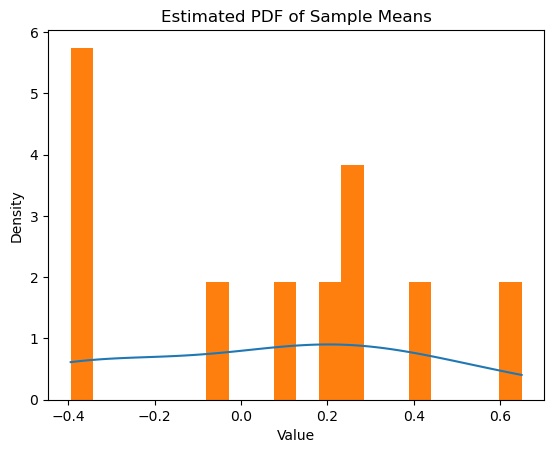

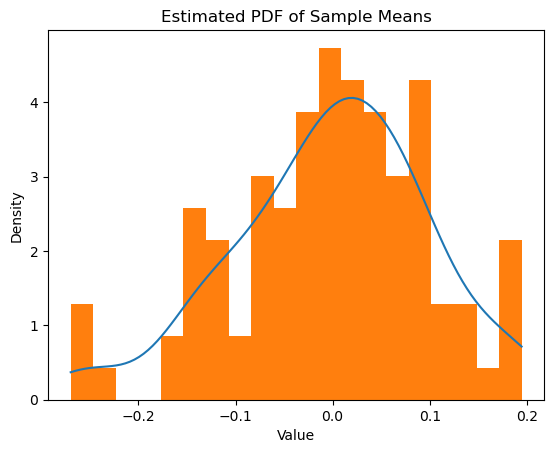

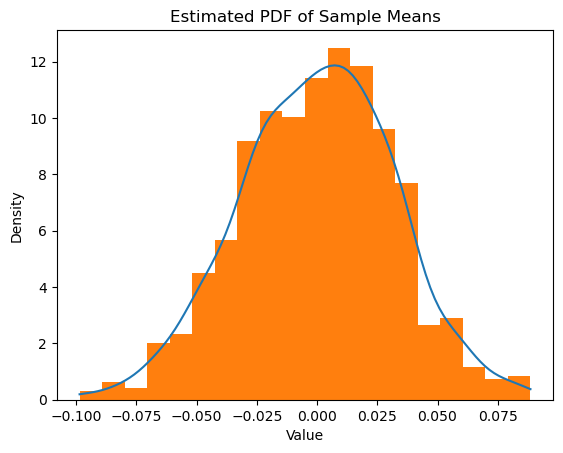

In [14]:
class sample_mean_distribution:
    def __init__(self, m):
        """ Implements a mean of a probability measure which we sample m times. 
            As explained in model m, 
        """
        self.m = m
        self.result = sample_mean(self.m, self.m)

    def plot_pdf(self):
        """
            Plot pdf of the sample distribution, two methods,
            assume distribution is normal and calculate based on mean and standard deviation
            or use kde to determine pdf from histogram samples.
        """
        # plt.hist(self.result, bins=20, density=True)  # Create histogram
        # xmin, xmax = plt.xlim()
        # x = np.linspace(xmin, xmax, 100)
        # p = stats.norm.pdf(x, np.mean(self.result), np.std(self.result))  # Fit a normal distribution to the data
        # plt.plot(x, p, 'k', color='red')
        # title = "Fit results: mu = %.2f,  std = %.2f" % (np.mean(self.result), np.std(self.result))
        # plt.title(title)
        # plt.show()
        kde = stats.gaussian_kde(self.result)
        x = np.linspace(min(self.result), max(self.result), 100)
        plt.plot(x, kde(x))
        plt.title("Estimated PDF of Sample Means")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.hist(self.result, bins=20, density=True)  # Create histogram
        plt.show()
        


smd = sample_mean_distribution(10)
smd.plot_pdf()


smd = sample_mean_distribution(100)
smd.plot_pdf()

smd = sample_mean_distribution(1000)
smd.plot_pdf()


The more samples we obtain from the distribution, the more identical the pmf of the normal distribution, where the mean or standard deviation.


End of Submission 2 | 5/11/2023
---------